In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import sys
from pathlib import Path
import os
sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "regression_paths", "insurance_dataset_path")

Extracting : 100%|██████████| 1/1 [00:00<00:00, 1000.55it/s]


In [2]:
df = pd.read_csv('insurance.csv')
ddf = pd.read_csv('insurance.csv')
print(df.isnull().sum())
print(df.isnull())
print(df.head())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   

In [3]:
print(len(df[ (df['smoker']=='yes')]))
df.drop(df[df['smoker'] == 'yes'].index, inplace = True)
print(df)

274
      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


In [4]:
print(len(ddf[ (ddf['smoker']=='no')]))
ddf.drop(df[df['smoker'] == 'no'].index, inplace = True)
print(ddf)

1064
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]


In [5]:
df = df.sample(n=274)
print(df.shape)
print(df)

(274, 7)
     age     sex     bmi  children smoker     region      charges
81    45  female  38.285         0     no  northeast   7935.29115
282   30    male  27.645         1     no  northeast   4237.12655
550   63    male  30.800         0     no  southwest  13390.55900
985   44  female  25.800         1     no  southwest   7624.63000
619   55  female  37.100         0     no  southwest  10713.64400
..   ...     ...     ...       ...    ...        ...          ...
683   53    male  24.320         0     no  northwest   9863.47180
829   39    male  21.850         1     no  northwest   6117.49450
137   22    male  25.175         0     no  northwest   2045.68525
670   30    male  31.570         3     no  southeast   4837.58230
695   26  female  40.185         0     no  northwest   3201.24515

[274 rows x 7 columns]


In [6]:
frames = [df, ddf]
df = pd.concat(frames)
print(df)
print(df.shape)

      age     sex     bmi  children smoker     region      charges
81     45  female  38.285         0     no  northeast   7935.29115
282    30    male  27.645         1     no  northeast   4237.12655
550    63    male  30.800         0     no  southwest  13390.55900
985    44  female  25.800         1     no  southwest   7624.63000
619    55  female  37.100         0     no  southwest  10713.64400
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[548 rows x 7 columns]
(548, 7)


Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

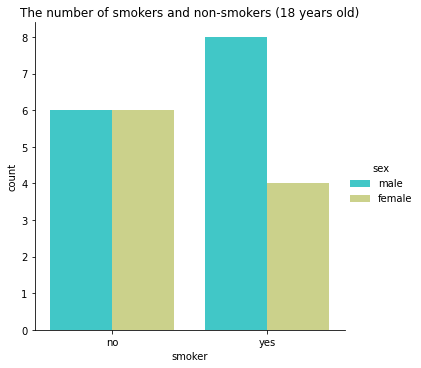

In [7]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

In [161]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region) 
df.region = le.transform(df.region)

In [162]:
print(len(df[ (df['smoker']==0)]))

274


<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

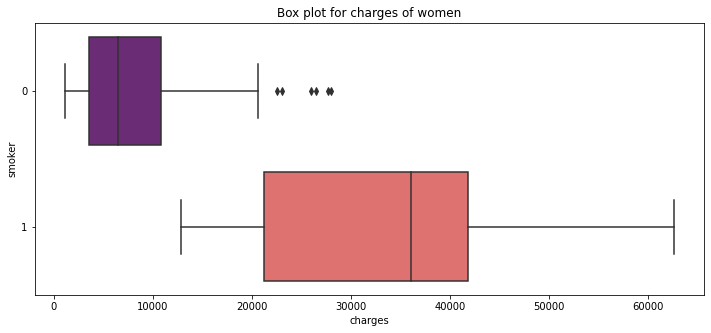

In [163]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

In [93]:
'''def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

df = remove_outlier(df, 'charges')

print(df.shape)'''


"def remove_outlier(df, col_name):\n  q1 = df[col_name].quantile(0.25)\n  q3 = df[col_name].quantile(0.75)\n  iqr = q3-q1 #Interquartile range\n  fence_low  = q1-1.5*iqr\n  fence_high = q3+1.5*iqr\n  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]\n  return df_out\n\ndf = remove_outlier(df, 'charges')\n\nprint(df.shape)"

In [164]:
df.corr()['charges'].sort_values()

children   -0.001454
region      0.006566
sex         0.098312
age         0.246809
bmi         0.371904
smoker      0.795904
charges     1.000000
Name: charges, dtype: float64

In [165]:
df.corr()['charges'].sort_values()

children   -0.001454
region      0.006566
sex         0.098312
age         0.246809
bmi         0.371904
smoker      0.795904
charges     1.000000
Name: charges, dtype: float64

C:\Users\abulf\AppData\Local\Temp\ipykernel_10744\1378907797.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

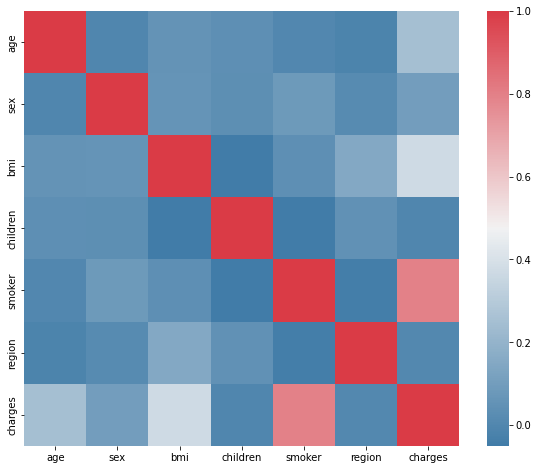

In [166]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [167]:
from sklearn import preprocessing
columns = df.columns
for i in columns:
    if df.dtypes[i] is object:
        print("Cannot process object data")
    

## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
scale_list = []
normalise_list = []
data_skew = df.skew()

for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
        scale_list.append(i)
    else:
        normalise_list.append(i)
print(scale_list)
print(normalise_list)

#standard_scaler = preprocessing.StandardScaler()
#standard_scaler.fit()

['age', 'sex', 'bmi', 'smoker', 'region']
['children', 'charges']


In [168]:
col_names = ['age', 'bmi']
features = df[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features
print(df)

           age  sex       bmi  children  smoker  region      charges
908   1.769411    1  1.566535         3       0       3  15170.06900
1113 -0.757566    0 -0.702828         3       0       1   5312.16985
363  -1.262961    0 -0.688523         1       0       3   2597.77900
892   1.119617    1 -1.086524         0       0       0  10422.91665
1115  1.191816    1  0.366642         1       0       2  10807.48630
...        ...  ...       ...       ...     ...     ...          ...
1313 -1.407360    0  0.708266         2       1       3  36397.57600
1314 -0.613167    0 -1.150473         3       1       1  18765.87545
1321  1.697211    1 -0.638878         0       1       0  28101.33305
1323  0.253225    0  1.662459         2       1       2  43896.37630
1337  1.625012    0 -0.239195         0       1       1  29141.36030

[548 rows x 7 columns]


In [169]:
col_names = ['charges']
features = df[col_names]
scaler = preprocessing.MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features
print(df)

           age  sex       bmi  children  smoker  region   charges
908   1.769411    1  1.566535         3       0       3  0.224058
1113 -0.757566    0 -0.702828         3       0       1  0.066669
363  -1.262961    0 -0.688523         1       0       3  0.023332
892   1.119617    1 -1.086524         0       0       0  0.148266
1115  1.191816    1  0.366642         1       0       2  0.154406
...        ...  ...       ...       ...     ...     ...       ...
1313 -1.407360    0  0.708266         2       1       3  0.562972
1314 -0.613167    0 -1.150473         3       1       1  0.281468
1321  1.697211    1 -0.638878         0       1       0  0.430516
1323  0.253225    0  1.662459         2       1       2  0.682696
1337  1.625012    0 -0.239195         0       1       1  0.447121

[548 rows x 7 columns]


In [170]:
df.corr()['charges'].sort_values()

children   -0.001454
region      0.006566
sex         0.098312
age         0.246809
bmi         0.371904
smoker      0.795904
charges     1.000000
Name: charges, dtype: float64

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

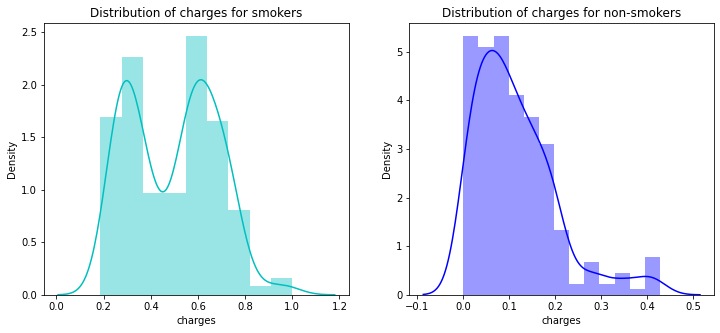

In [171]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

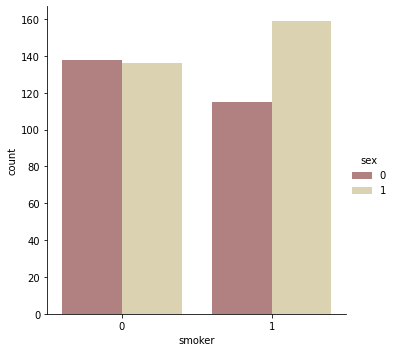

In [172]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

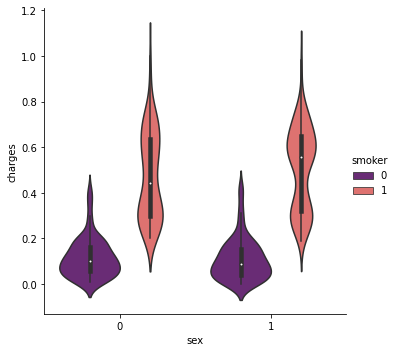

In [173]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

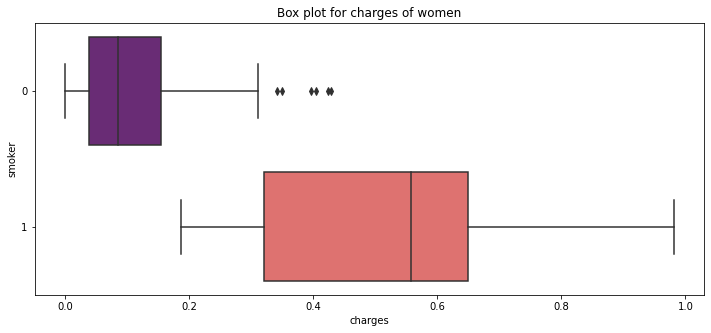

In [174]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

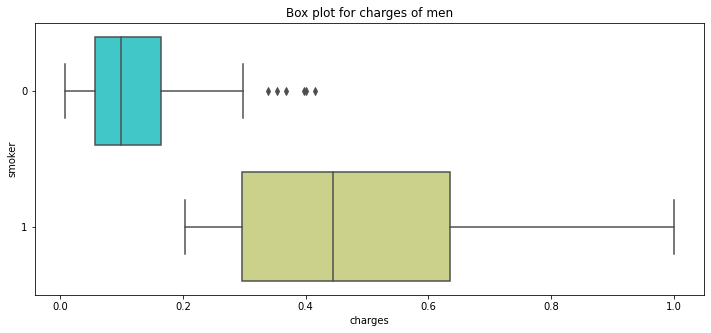

In [175]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


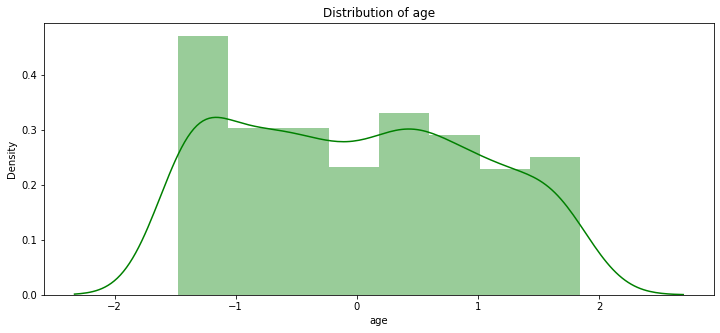

In [176]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

In [177]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

ValueError: min() arg is an empty sequence

ValueError: min() arg is an empty sequence

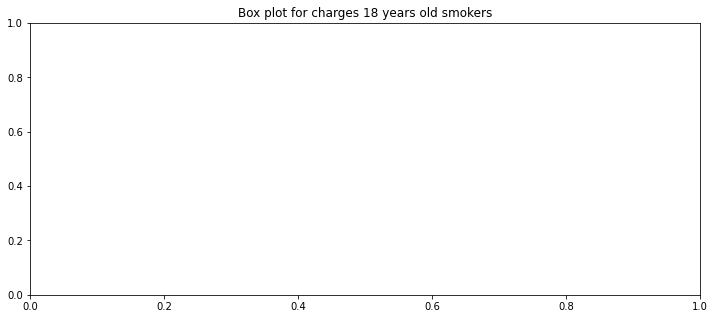

In [178]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

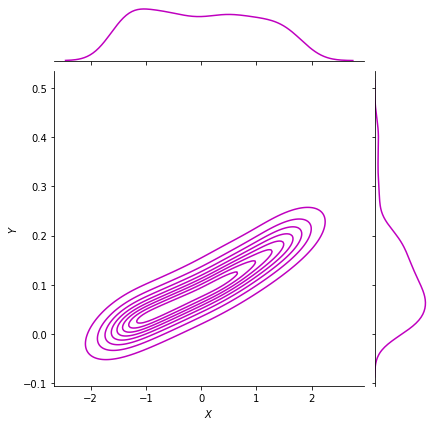

In [179]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

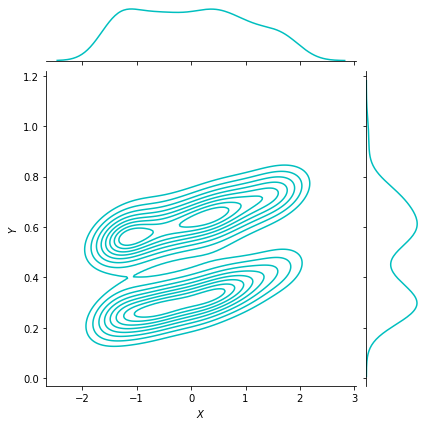

In [180]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

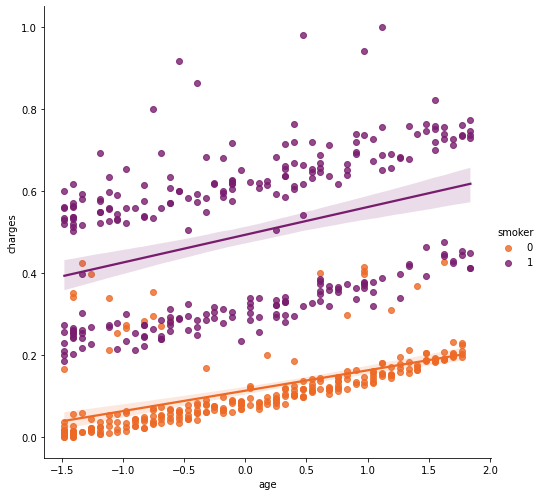

In [181]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


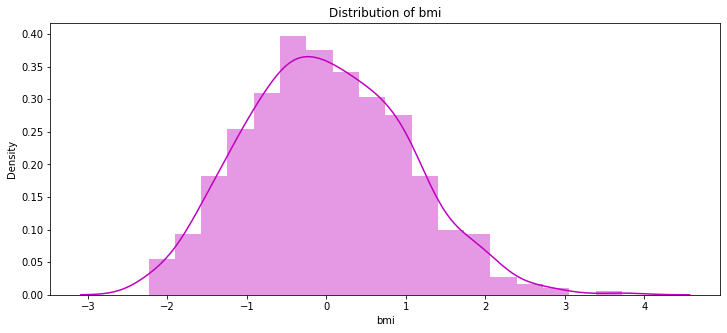

In [182]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


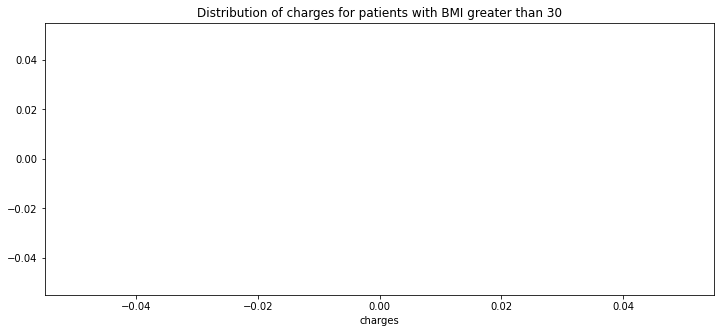

In [183]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


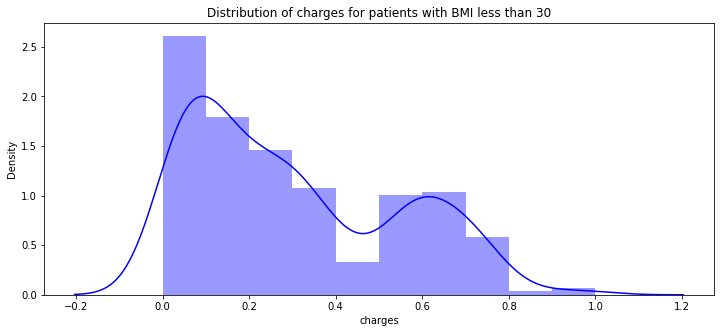

In [184]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

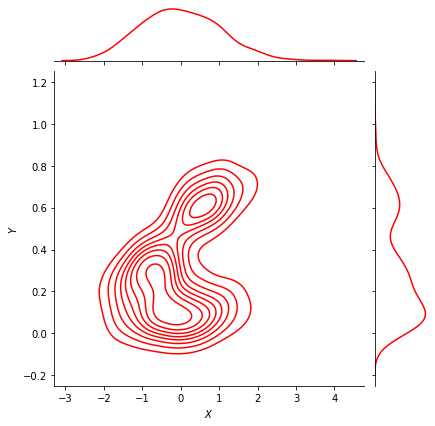

In [185]:
g = sns.jointplot(x="bmi", y="charges", data = df,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


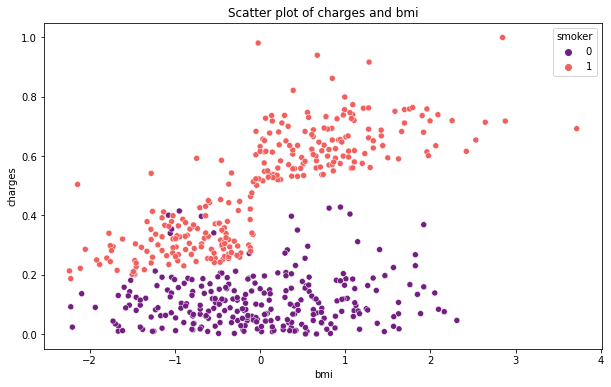

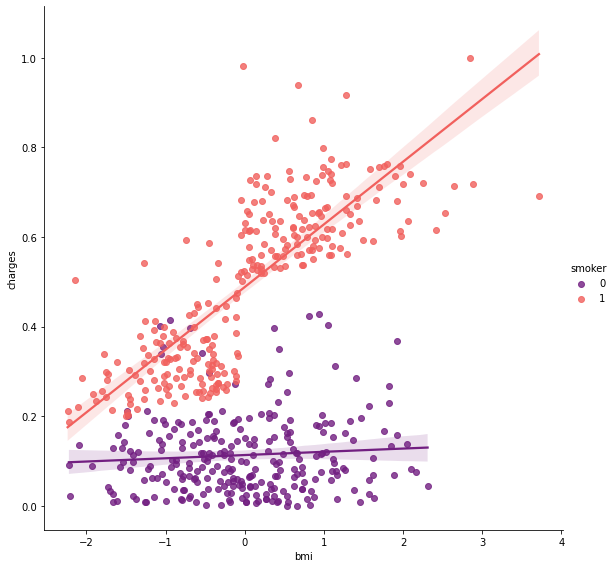

In [186]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [188]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.8051799706013218


In [189]:
from pandas import DataFrame
X = df.drop(['charges','region'], axis = 1)
Y = df.charges


#for d in range(1,4):
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X = DataFrame(x_quad)
print(X.shape)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
score = plr.score(X_test,Y_test)
error = mae(Y_test,Y_test_pred)
mse = mean_squared_error(Y_test,Y_test_pred)
y_true, y_pred = np.array(Y_test), np.array(Y_test_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)



(548, 21)
0.8801073176248968
0.06092725443700681
0.007136034131658808
39.6403429877993
19.60210171674468


In [190]:
mape = np.mean(np.abs((y_true - y_pred) / y_true)*100)
print(mape)

39.64034298779931


In [191]:
X_hat = np.mean(y_true)
value = error/X_hat
print(value)

0.1862794596128376


In [192]:
from pandas import DataFrame
X = df.drop(['charges','region'], axis = 1)
Y = df.charges


#for d in range(1,4):
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X = DataFrame(x_quad)
print(X.shape)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state = 0)

model = XGBRegressor().fit(X_train,Y_train)

#Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
score = r2_score(Y_test,Y_test_pred)
error = mae(Y_test,Y_test_pred)
#mdap
mse = mean_squared_error(Y_test,Y_test_pred)
y_true, y_pred = np.array(Y_test), np.array(Y_test_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

(548, 21)
0.875811666596851
0.048465122738467835
0.0073917120575052375
36.428926206254616
8.958980813867461


In [193]:
from pandas import DataFrame
X = df.drop(['charges','region'], axis = 1)
Y = df.charges


#for d in range(1,4):
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X = DataFrame(x_quad)
print(X.shape)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state = 0)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)

#Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)
score = r2_score(Y_test,Y_test_pred)
error = mae(Y_test,Y_test_pred)
#mdap
mse = mean_squared_error(Y_test,Y_test_pred)
y_true, y_pred = np.array(Y_test), np.array(Y_test_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

(548, 21)
0.7950533017831988
0.07083909496593563
0.012198464532390627
58.41664997277527
17.130132351291373


In [194]:
from pandas import DataFrame
X = df.drop(['charges','region'], axis = 1)
Y = df.charges


#for d in range(1,4):
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X = DataFrame(x_quad)
print(X.shape)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state = 0)

regressor = SVR(kernel = 'rbf').fit(X_train,Y_train)

#Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
score = r2_score(Y_test,Y_test_pred)
error = mae(Y_test,Y_test_pred)
#mdap
mse = mean_squared_error(Y_test,Y_test_pred)
y_true, y_pred = np.array(Y_test), np.array(Y_test_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

(548, 21)
0.8345398659697912
0.08583745940491419
0.009848217092802326
95.07782981041726
29.13834209298114


In [195]:
from pandas import DataFrame
X = df.drop(['charges','region'], axis = 1)
Y = df.charges


#for d in range(1,4):
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X = DataFrame(x_quad)
print(X.shape)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state = 0)

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1).fit(X_train,Y_train)

Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)
score = r2_score(Y_test,Y_test_pred)
error = mae(Y_test,Y_test_pred)
#mdap
mse = mean_squared_error(Y_test,Y_test_pred)
y_true, y_pred = np.array(Y_test), np.array(Y_test_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mse)
print(mape)
print(mdape)

(548, 21)
0.903879653450549
0.04287693145563836
0.005721100405258702
36.986492424831354
6.719832700341829


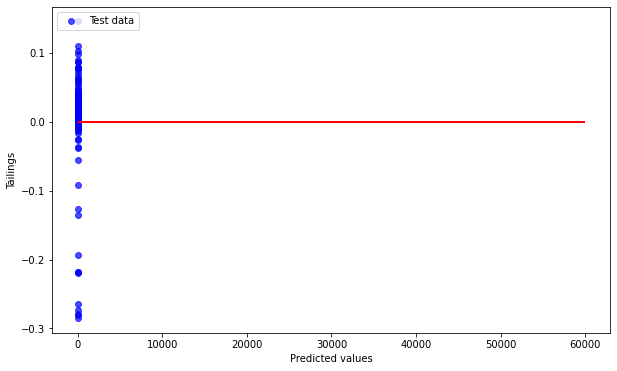

In [196]:
plt.figure(figsize=(10,6))

'''plt.scatter(Y_train_pred,Y_train_pred - Y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')'''
plt.scatter(Y_test_pred,Y_test_pred - Y_test,
          c = 'b', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

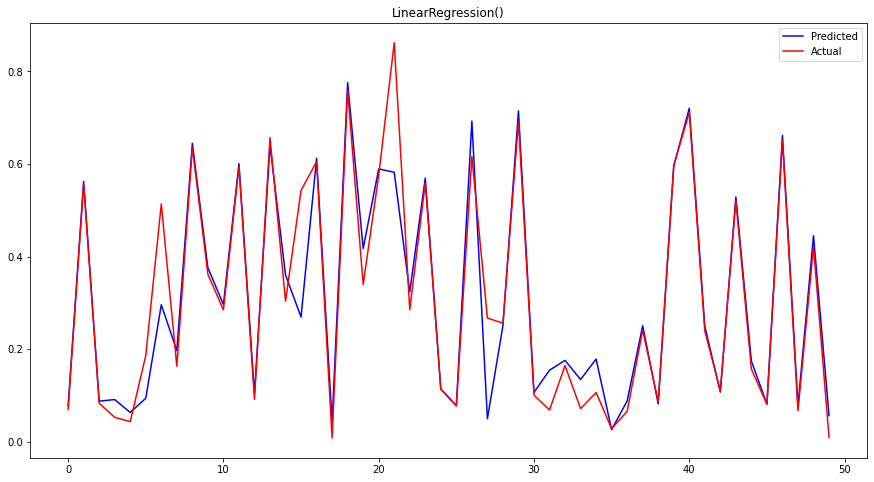

In [197]:
  plt.figure(figsize=(15, 8))
  y_true, y_pred = np.array(Y_test), np.array(Y_test_pred)
  plt.plot(y_pred[0:50], label='Predicted', color="blue")
  plt.plot(y_true[0:50], label='Actual', color="red")
  plt.title(plr)
  plt.legend()

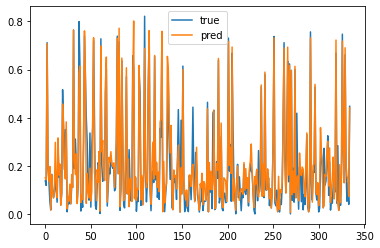

In [88]:


plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["true", "pred"])
plt.show()